# ケーススタディ１: ２値分類

UCIで提供されているデータセット[Bank Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing)を使う。
データセットをロードするためのPythonモジュールは[ここ](https://github.com/uci-ml-repo/ucimlrepo)で公開されている。
pipで簡単に導入もできる。

機械学習を使って、営業の成功・失敗の予測をさせる例

In [732]:
!pip3 install ucimlrepo --break-system-packages | tail -1

In [733]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

In [734]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [735]:
# columnsの日本語化
X.columns = ['年齢', '職業', '婚姻', '学歴', '債務不履行', '平均残高', '住宅ローン',
             '個人ローン', '連絡手段', '最終通話日', '最終通話月', '最終通話秒数', '通話回数_販促中',
             '前回販促後_経過日数', '通話回数_販促前', '前回販促結果']

In [736]:
X.head()

,年齢,職業,婚姻,学歴,債務不履行,平均残高,住宅ローン,個人ローン,連絡手段,最終通話日,最終通話月,最終通話秒数,通話回数_販促中,前回販促後_経過日数,通話回数_販促前,前回販促結果
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [737]:
X.shape

(45211, 16)

## 前処理

### 欠損値の処理

In [738]:
X.isnull().sum()

年齢                0
職業              288
婚姻                0
学歴             1857
債務不履行             0
平均残高              0
住宅ローン             0
個人ローン             0
連絡手段          13020
最終通話日             0
最終通話月             0
最終通話秒数            0
通話回数_販促中          0
前回販促後_経過日数        0
通話回数_販促前          0
前回販促結果        36959
dtype: int64

すべて、カテゴリカル値に関する欠損値なので'unknown'というラベル値にする

In [739]:
X = X.fillna({'職業': 'unknown', '学歴': 'unknown', '連絡手段': 'unknown', '前回販促結果': 'unknown'})

In [740]:
X.isnull().sum()

年齢            0
職業            0
婚姻            0
学歴            0
債務不履行         0
平均残高          0
住宅ローン         0
個人ローン         0
連絡手段          0
最終通話日         0
最終通話月         0
最終通話秒数        0
通話回数_販促中      0
前回販促後_経過日数    0
通話回数_販促前      0
前回販促結果        0
dtype: int64

### カテゴリカル値のOne Hotエンコーディング

In [741]:
X['職業'].value_counts()

職業
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [742]:
X['婚姻'].value_counts()

婚姻
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [743]:
X['学歴'].value_counts()

学歴
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [744]:
X['連絡手段'].value_counts()

連絡手段
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [745]:
X['前回販促結果'].value_counts()

前回販促結果
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [746]:
import pandas as pd

# カテゴリカル値のOne Hotエンコーディング
def enc(df, column):
    # dtype is set to 'bool' by default, so we have to specify dtype as 'int'
    df_dummy = pd.get_dummies(df[column], prefix=column, dtype=int)
    df = pd.concat([df.drop([column], axis=1), df_dummy], axis=1)
    return df

In [747]:
X1 = X.copy()
X1 = enc(X1, '職業')
X1 = enc(X1, '婚姻')
X1 = enc(X1, '学歴')
X1 = enc(X1, '連絡手段')
X1 = enc(X1, '前回販促結果')

#### 今回の販促結果の確認

In [748]:
y.isnull().sum()

y    0
dtype: int64

In [749]:
y.value_counts()

y  
no     39922
yes     5289
Name: count, dtype: int64

In [750]:
X1.head()

,年齢,債務不履行,平均残高,住宅ローン,個人ローン,最終通話日,最終通話月,最終通話秒数,通話回数_販促中,前回販促後_経過日数,...,学歴_secondary,学歴_tertiary,学歴_unknown,連絡手段_cellular,連絡手段_telephone,連絡手段_unknown,前回販促結果_failure,前回販促結果_other,前回販促結果_success,前回販促結果_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


### バイナリ値の処理

In [751]:
X1['債務不履行'] = X1['債務不履行'].map(dict(yes=1, no=0))
X1['住宅ローン'] = X1['住宅ローン'].map(dict(yes=1, no=0))
X1['個人ローン'] = X1['個人ローン'].map(dict(yes=1, no=0))
#y = y.map(dict(yes=1, no=0))

In [752]:
X1.head()

,年齢,債務不履行,平均残高,住宅ローン,個人ローン,最終通話日,最終通話月,最終通話秒数,通話回数_販促中,前回販促後_経過日数,...,学歴_secondary,学歴_tertiary,学歴_unknown,連絡手段_cellular,連絡手段_telephone,連絡手段_unknown,前回販促結果_failure,前回販促結果_other,前回販促結果_success,前回販促結果_unknown
0,58,0,2143,1,0,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


In [753]:
y1 = y.copy()
y1['y'] = y1['y'].map(dict(yes=1, no=0))

### 月名の処理

カテゴリカル値と違い、順序があるので、単純にOne Hotエンコーディングすると、情報が失われる。
そこで、月名は数値に変えてしまう。

In [754]:
X1['最終通話月'].value_counts()

最終通話月
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [755]:
month_dict = dict(jan=1, feb=2, mar=3, apr=4, may=5, jun=6,
                  jul=7, aug=8, sep=9, oct=10, nov=11, dec=12)

def enc_month(df, column):
    df[column] = df[column].map(month_dict)
    return df

In [756]:
X1 = enc_month(X1, '最終通話月')

In [757]:
X1['最終通話月'].value_counts()

最終通話月
5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: count, dtype: int64

In [758]:
X1.head()

,年齢,債務不履行,平均残高,住宅ローン,個人ローン,最終通話日,最終通話月,最終通話秒数,通話回数_販促中,前回販促後_経過日数,...,学歴_secondary,学歴_tertiary,学歴_unknown,連絡手段_cellular,連絡手段_telephone,連絡手段_unknown,前回販促結果_failure,前回販促結果_other,前回販促結果_success,前回販促結果_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


In [759]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X1[['平均残高', '最終通話秒数']] = stdsc.fit_transform(X1[['平均残高', '最終通話秒数']])

In [760]:
## データ分割
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X1, y1.to_numpy().flatten(), test_size=0.4, random_state=123, stratify=y)
#x_train, x_test, y_train, y_test = train_test_split(X1, y1.to_numpy().flatten(), test_size=0.4, random_state=123)

In [761]:
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(27126, 37)

(27126,)

(18085, 37)

(18085,)

## アルゴリズムの選択

In [771]:
from sklearn.linear_model import LogisticRegression
# 収束性が悪いので、反復回数を増やした
# https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter
algorithm1 = LogisticRegression(random_state=123, max_iter=2000)

from sklearn.tree import DecisionTreeClassifier
algorithm2 = DecisionTreeClassifier(random_state=123)

from sklearn.ensemble import RandomForestClassifier
algorithm3 = RandomForestClassifier(random_state=123)

from xgboost import XGBClassifier
algorithm4 = XGBClassifier(random_state=123)

algorithms = [algorithm1, algorithm2, algorithm3, algorithm4]

In [772]:
from sklearn.model_selection import StratifiedKFold
stratifiedkfold = StratifiedKFold(n_splits=3)

In [773]:
from sklearn.model_selection import cross_val_score
for algorithm in algorithms:
    scores = cross_val_score(algorithm, x_train, y_train,
                             cv=stratifiedkfold, scoring='roc_auc')
    score = scores.mean()
    name = algorithm.__class__.__name__
    print(f'平均スコア: {score:.4f} / 個別スコア: {scores} / {name}')

平均スコア: 0.8917 / 個別スコア: [0.89752522 0.887054   0.8905944 ] / LogisticRegression
平均スコア: 0.6960 / 個別スコア: [0.69208864 0.70227257 0.69360649] / DecisionTreeClassifier
平均スコア: 0.9200 / 個別スコア: [0.92575199 0.91960581 0.91452085] / RandomForestClassifier
平均スコア: 0.9242 / 個別スコア: [0.92346352 0.92578931 0.92346585] / XGBClassifier


XGBoostが最良の結果になった

## 学習・予測・評価

In [783]:
# 学習
algorithm = XGBClassifier(random_state=123)
algorithm.fit(x_train, y_train)
y_pred = algorithm.predict(x_test)

In [784]:
# 評価
from sklearn.metrics import confusion_matrix
ans = confusion_matrix(y_test, y_pred)

display(ans)

array([[15375,   594],
       [ 1106,  1010]])

In [785]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f'適合率: {precision:.4f} / 再現率: {recall:.4f} / F値: {fscore:.4f}')

適合率: 0.6297 / 再現率: 0.4773 / F値: 0.5430


## チューニング

２値分類は、多くの場合、最終的に０か１（２値）に分ける基準となる計算結果が確率として与えられる。
0.5以上ならば１、それ未満なら０という分け方をする。この0.5の値を動かすことで、性能が改善できる
ことがある。

ここでは、まず、それを確認する。

/var/folders/lt/2bhwysg14ml43c8pjrzwjxs00000gn/T/ipykernel_9873/397722115.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y1, kde=False, norm_hist=True, bins=50, color='b', label='成功')
/var/folders/lt/2bhwysg14ml43c8pjrzwjxs00000gn/T/ipykernel_9873/397722115.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe

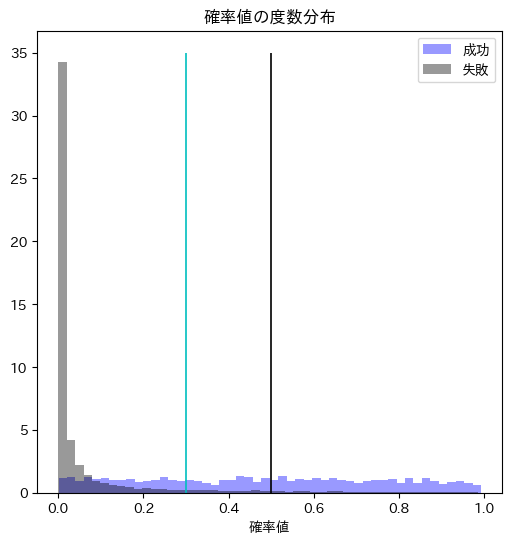

In [786]:
import seaborn as sns

y_proba0 = algorithm.predict_proba(x_test)[:, 1]
y0 = y_proba0[y_test == 0]
y1 = y_proba0[y_test == 1]

import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(6, 6))
plt.title('確率値の度数分布')
sns.distplot(y1, kde=False, norm_hist=True, bins=50, color='b', label='成功')
#plt.hist(y1, bins=3000, color='r', label='成功', alpha=0.3)
sns.distplot(y0, kde=False, norm_hist=True, bins=50, color='k', label='失敗')
#plt.hist(y0, bins=3000, color='b', label='失敗', alpha=0.3)
plt.vlines(0.5, 0, 35, color='k')
plt.vlines(0.3, 0, 35, color='c')
plt.xlabel('確率値')
#plt.ylim(0, 750)
plt.legend()

sns.distplotはdeprecatedなので、sns.histplot/sns.displotを使え、と怒られている。
まだ使えるので、とりあえず結果を見るためにこのまま。

In [804]:
def pred(algorithm, x, threshold):
    y_proba = algorithm.predict_proba(x)
    y_proba1 = y_proba[:, 1]
    y_pred = (y_proba1 > threshold).astype(int) # mapping yes/no to 1/0
    return y_pred


In [805]:
import numpy as np

threshold_list = np.arange(0.5, 0, -0.05)

for threshold in threshold_list:
    y_pred = pred(algorithm, x_test, threshold)
    pred_sum = y_pred.sum()
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print(f'閾値: {threshold:.2f} / 陽性予測数: {pred_sum} / 適合率: {precision:.4f} / 再現率: {recall:.4f} / F値: {fscore:.4f}')

閾値: 0.50 / 陽性予測数: 1604 / 適合率: 0.6297 / 再現率: 0.4773 / F値: 0.5430
閾値: 0.45 / 陽性予測数: 1847 / 適合率: 0.6075 / 再現率: 0.5302 / F値: 0.5662
閾値: 0.40 / 陽性予測数: 2102 / 適合率: 0.5942 / 再現率: 0.5903 / F値: 0.5922
閾値: 0.35 / 陽性予測数: 2329 / 適合率: 0.5715 / 再現率: 0.6290 / F値: 0.5989
閾値: 0.30 / 陽性予測数: 2591 / 適合率: 0.5546 / 再現率: 0.6791 / F値: 0.6106
閾値: 0.25 / 陽性予測数: 2873 / 適合率: 0.5371 / 再現率: 0.7292 / F値: 0.6186
閾値: 0.20 / 陽性予測数: 3240 / 適合率: 0.5108 / 再現率: 0.7821 / F値: 0.6180
閾値: 0.15 / 陽性予測数: 3662 / 適合率: 0.4806 / 再現率: 0.8318 / F値: 0.6092
閾値: 0.10 / 陽性予測数: 4319 / 適合率: 0.4348 / 再現率: 0.8875 / F値: 0.5837
閾値: 0.05 / 陽性予測数: 5461 / 適合率: 0.3666 / 再現率: 0.9461 / F値: 0.5284


適合率と再現率のトレードオフが見える。この２つのバランスが良い地点として、F値の値を見る。

## 重要度分析

どの要素が結果に影響を与えるかの分析

([<matplotlib.axis.XTick at 0x14f40bce0>,
 [Text(0, 0, '前回販促結果_success'),
  Text(1, 0, '連絡手段_unknown'),
  Text(2, 0, '最終通話秒数'),
  Text(3, 0, '住宅ローン'),
  Text(4, 0, '前回販促結果_unknown'),
  Text(5, 0, '連絡手段_cellular'),
  Text(6, 0, '最終通話月'),
  Text(7, 0, '個人ローン'),
  Text(8, 0, '最終通話日'),
  Text(9, 0, '前回販促後_経過日数')])

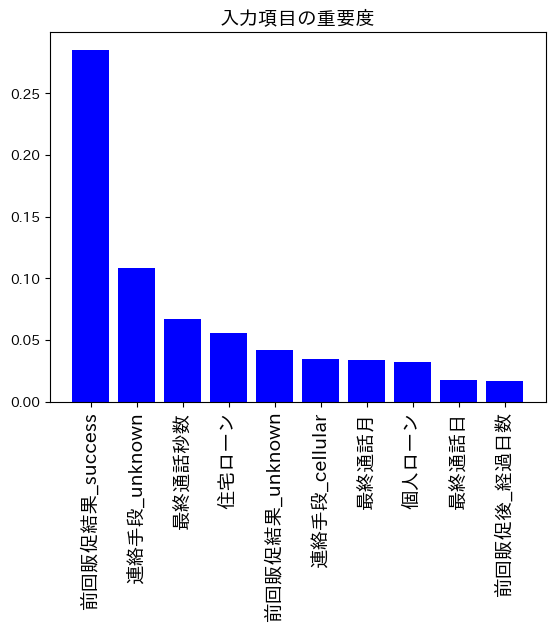

In [806]:
importances = algorithm.feature_importances_

w = pd.Series(importances, index=X1.columns)
u = w.sort_values(ascending=False)
v = u[:10]

plt.title("入力項目の重要度", fontsize=14)
plt.bar(range(len(v)), v, color='b', align='center')
plt.xticks(range(len(v)), v.index, rotation=90., fontsize=14)

/var/folders/lt/2bhwysg14ml43c8pjrzwjxs00000gn/T/ipykernel_9873/1037157759.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_test[y_test == 1][column], kde=False, norm_hist=True, bins=5, color='b', label='成功')
/var/folders/lt/2bhwysg14ml43c8pjrzwjxs00000gn/T/ipykernel_9873/1037157759.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44

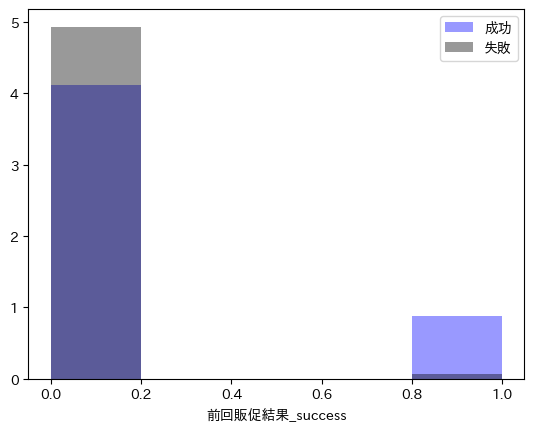

In [811]:
column = '前回販促結果_success'

sns.distplot(x_test[y_test == 1][column], kde=False, norm_hist=True, bins=5, color='b', label='成功')
sns.distplot(x_test[y_test == 0][column], kde=False, norm_hist=True, bins=5, color='k', label='失敗')
plt.legend()

「前回販促結果がsuccessだと成約率も高くなる」という結果

/var/folders/lt/2bhwysg14ml43c8pjrzwjxs00000gn/T/ipykernel_9873/3585927443.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_test[y_test == 1][column], kde=False, norm_hist=True, bins=5, color='b', label='成功')
/var/folders/lt/2bhwysg14ml43c8pjrzwjxs00000gn/T/ipykernel_9873/3585927443.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44

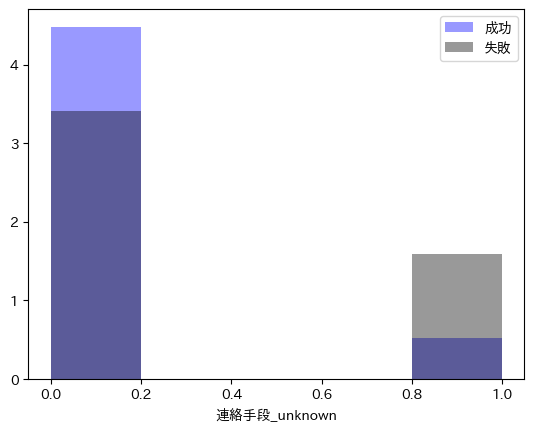

In [812]:
column = '連絡手段_unknown'

sns.distplot(x_test[y_test == 1][column], kde=False, norm_hist=True, bins=5, color='b', label='成功')
sns.distplot(x_test[y_test == 0][column], kde=False, norm_hist=True, bins=5, color='k', label='失敗')
plt.legend()

「連絡手段がunknownだと成約率が低くなる」という結果

/var/folders/lt/2bhwysg14ml43c8pjrzwjxs00000gn/T/ipykernel_9873/2528635041.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_test[y_test == 1][column], kde=False, norm_hist=True, bins=50, color='b', label='成功')
/var/folders/lt/2bhwysg14ml43c8pjrzwjxs00000gn/T/ipykernel_9873/2528635041.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de4

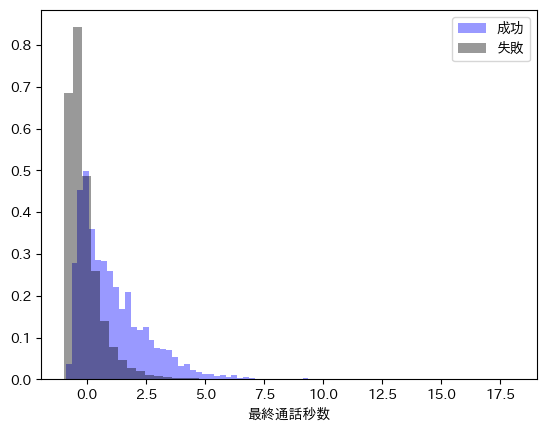

In [814]:
column = '最終通話秒数'

sns.distplot(x_test[y_test == 1][column], kde=False, norm_hist=True, bins=50, color='b', label='成功')
sns.distplot(x_test[y_test == 0][column], kde=False, norm_hist=True, bins=50, color='k', label='失敗')
plt.legend()

「長く話している客ほど成約率が高い」という結果